In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [100]:
df = pd.read_csv("Churn Modeling.csv")
df.shape

(10000, 14)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [104]:
df1 = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df1.shape

(10000, 11)

In [105]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [106]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [107]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 2 categorical variables

The categorical variables : ['Geography', 'Gender']


In [108]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 9 numerical variables

The numerical variables : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [109]:
df1[categorical].nunique()

Geography    3
Gender       2
dtype: int64

In [110]:
df1.isnull().values.any()

False

array([[<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>],
       [<AxesSubplot: title={'center': 'Balance'}>,
        <AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>],
       [<AxesSubplot: title={'center': 'IsActiveMember'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'Exited'}>]], dtype=object)

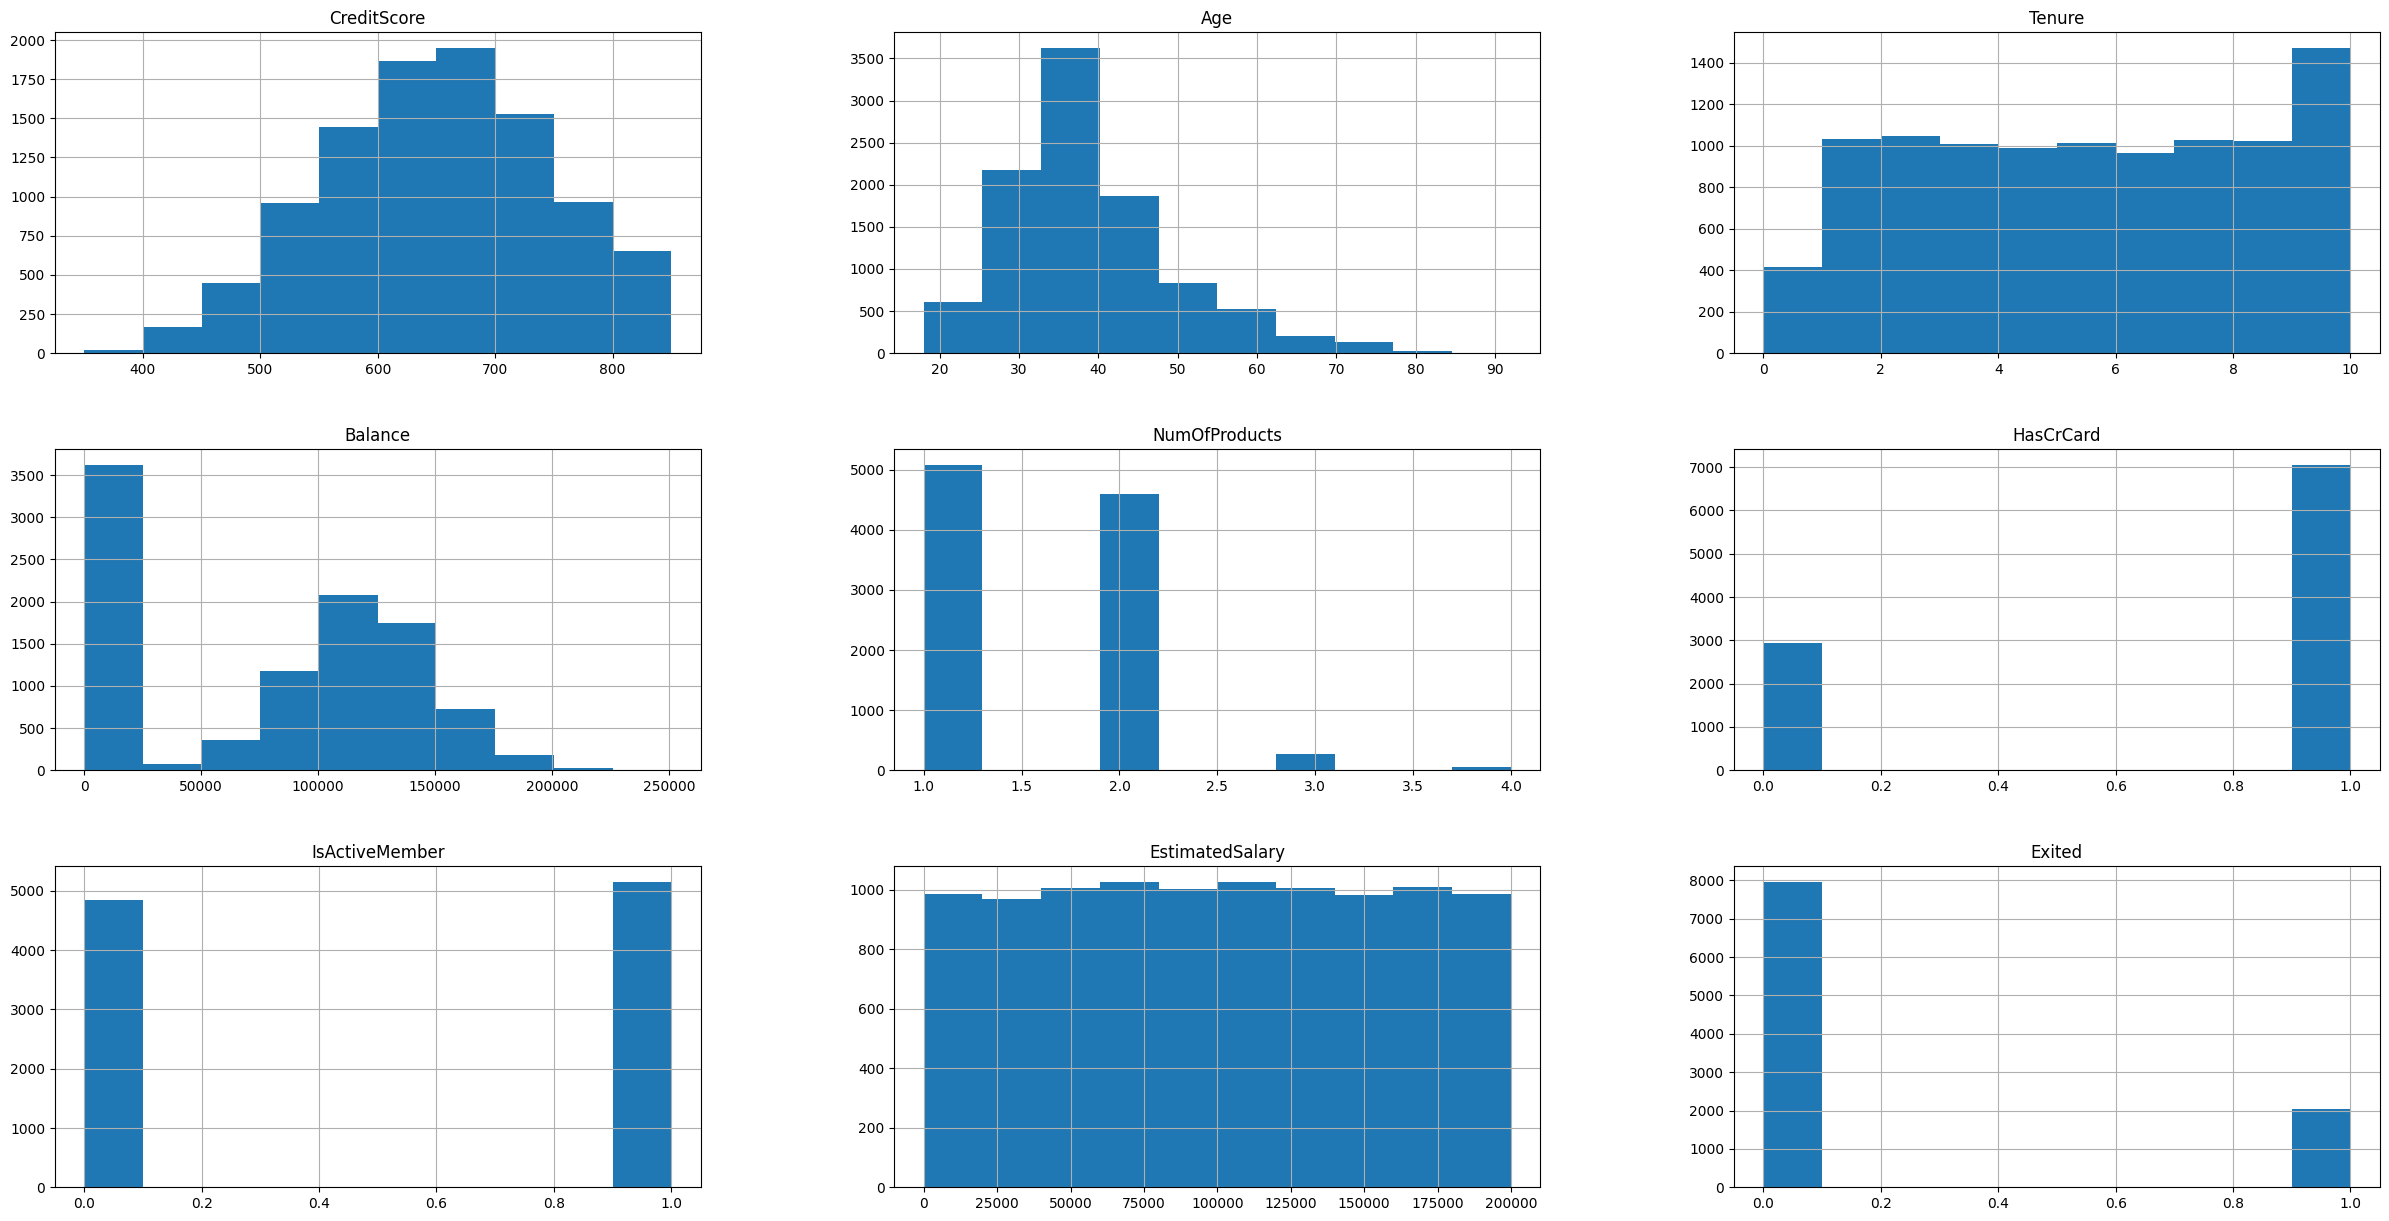

In [111]:
df1[numerical].hist(figsize=(30,15))

In [112]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

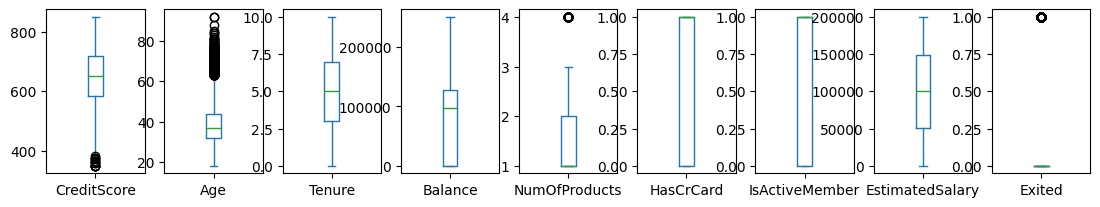

In [113]:
df1[numerical].plot(kind = "box",subplots = True,layout = (8,10),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [114]:
numerical

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [115]:
rem_list = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [116]:
df3 = treat_outliers_all(df1 , rem_list)

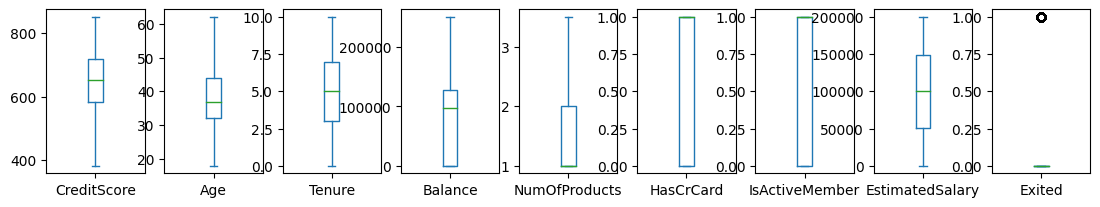

In [118]:
df3[numerical].plot(kind = "box",subplots = True,layout = (8,10),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [120]:
df3.shape

(10000, 11)

In [122]:
categorical

['Geography', 'Gender']

In [121]:
df4 = pd.get_dummies(data=df3,columns=categorical,drop_first=True)
df4.shape

(10000, 12)

In [123]:
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1.0,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2.0,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,0,1,0


Feature Engineering

In [124]:
X = df4.drop(['Exited'],axis=1)
y = df4.Exited

X.shape, y.shape

((10000, 11), (10000,))

In [125]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [129]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [130]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [131]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.8175
Test set score: 0.8155


In [132]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8460


In [133]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8655


In [134]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9999
Test set score: 0.8655


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}


In [138]:
y_pred = clf.predict(X_test_RF)

In [137]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.9215
Test set score: 0.8690


In [170]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

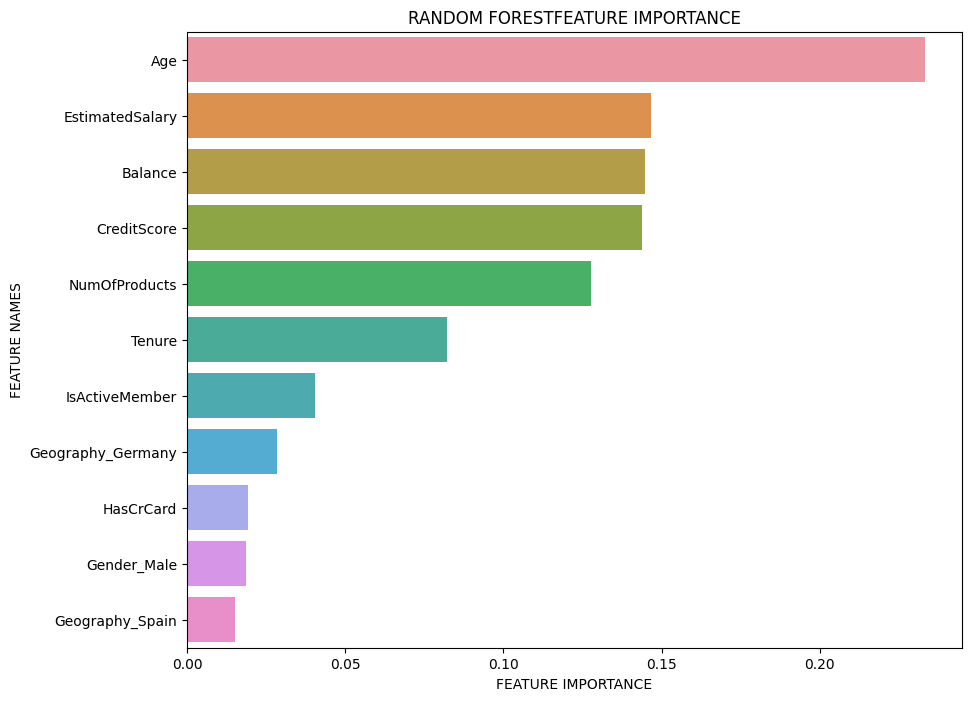

In [173]:
plot_feature_importance(rfc_100.feature_importances_,X_train_RF.columns,'RANDOM FOREST')

CNN

In [139]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [162]:
churn_model = Sequential()
churn_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dropout(0.2))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(256, activation = "relu"))
churn_model.add(Flatten())
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
# churn_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
churn_model.add(Dense(1, activation = "sigmoid"))
churn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3072      
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 256)              

In [163]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
churn_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [164]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [165]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='churn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [166]:
history=churn_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


50/50 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.7858
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to churn_model.h5
50/50 [==============================] - 1s 12ms/step - loss: 0.4763 - accuracy: 0.7858 - val_loss: 0.4334 - val_accuracy: 0.8000
Epoch 2/100
46/50 [==========================>...] - ETA: 0s - loss: 0.4265 - accuracy: 0.8139
Epoch 2: val_accuracy improved from 0.80000 to 0.85438, saving model to churn_model.h5
50/50 [==============================] - 0s 7ms/step - loss: 0.4248 - accuracy: 0.8156 - val_loss: 0.3839 - val_accuracy: 0.8544
Epoch 3/100
36/50 [====================>.........] - ETA: 0s - loss: 0.3825 - accuracy: 0.8435
Epoch 3: val_accuracy did not improve from 0.85438
50/50 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8444 - val_loss: 0.3794 - val_accuracy: 0.8537
Epoch 4/100
45/50 [==========================>...] - ETA: 0s - loss: 0.3686 - accuracy: 0.8462
Epoch 4: val_accuracy 

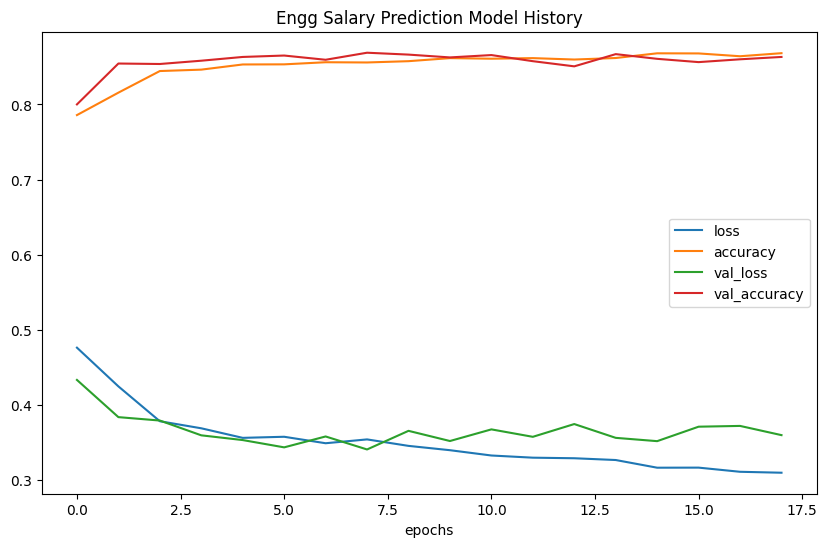

In [167]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [168]:
print("Evaluate churn_model against trained data")
score = churn_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

print("Evaluate churn_model against test data")
score = churn_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

Evaluate churn_model against trained data
score accuracy: 85.96%
Evaluate churn_model against test data
score accuracy: 85.35%
